In [83]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

# Eigen Values and Eigen Vectors using Power iteration method:

In [84]:
# Questn 1a

# def determinant(A): calculation is not recommended for determinantion of lambda
# We would reuquire to approximate the solutions 
#Power Iteration Method- Returns largest eigen value and vector

def matrix_dotproduct(A_matprod,B_matprod):
    result_matprod=[0 for i in range(len(A_matprod))]
    for i in range(len(A_matprod)):
        for j in range(len(A_matprod)):
            result_matprod[i]+=A_matprod[i][j]*B_matprod[j]
    return result_matprod

def dotproduct_vectors(A_dotproduct_vectors,B_dotproduct_vectors):
    C_dotproduct_vectors=0
    for i in range(len(A_dotproduct_vectors)):
        C_dotproduct_vectors+=A_dotproduct_vectors[i]*B_dotproduct_vectors[i]
    return C_dotproduct_vectors

def power_iteration(A_power_iter,power_guess_vector,tolerance_power,itermax_power = 100):
    lambda_old=0
    lambda_new=tolerance_power + 0.1                                    # Initializing the vectors to get a tolerance in the final solution.
    xii=[] 
    y_power_iter=copy.deepcopy(power_guess_vector)
    xi=copy.deepcopy(matrix_dotproduct(A_power_iter, y_power_iter))     #Assigning the starting value  xi

    i=0

    while abs(lambda_new-lambda_old) > tolerance_power   or i < itermax_power:
        i+=1
        lambda_old=lambda_new
        xii=copy.copy(matrix_dotproduct(A_power_iter,xi))      #Got xi+1 here
        xki=dotproduct_vectors(xi,y_power_iter)                #Got xi.y here
        xkii=dotproduct_vectors(xii,y_power_iter)              #Got xi+1.y here
        lambda_new= xkii/xki
        xi=copy.copy(xii)
        # print(xki)
        # print(xkii)
    return xii,lambda_new

def normalize(vector_norm):
    summation=0
    for i in range(len(vector_norm)):
        temp = vector_norm[i]**(2)
        summation+= round(temp,8)
    for i in range(len(vector_norm)):
        temp = (vector_norm[i]/summation**(0.5))
        vector_norm[i]= round(temp, 8)
                
    return vector_norm

In [85]:
# guess_vector=[1,1,1,0]
# A_=[[4,2/3,-4/3,4/3],[2/3,4,0,0],[-4/3,0,6,2],[4/3,0,2,6]]

# vector_power,evalue_power = power_iteration(A_,guess_vector,10**(-8))
# print("The eigen vector is: ",normalize(vector_power))


# print(f"The eigen value is :{evalue_power:.8f}     (upto 8th decimal place)")

# QR factorizaton using schmidt decomposition and finding the eigen values

In [86]:
# Questn 1b
def QR_SCD(A__):
    A_inp_QR = np.array(A__)
    
    Q_QR =  np.array([ [0  for i in range(len(A__))] for j in range(len(A__))])
    R_QR = ([ [0  for i in range(len(A__))] for j in range(len(A__))])
    e_i = np.array( [0  for i in range(len(A__))])
    
    for i in range(len(A__)):
        substraction_QR = 0
        for k in range(i):
            substraction_QR +=  np.dot(np.dot( A_inp_QR[:,i],Q_QR[:,k]),Q_QR[:,k])
        ui =  copy.deepcopy(A_inp_QR[i,:] - substraction_QR)
        norm_ui = np.linalg.norm(ui) 
        e_i = copy.deepcopy(ui / norm_ui)
        for j in range(len(A__)):
            Q_QR = Q_QR.tolist() 
            e_i = e_i.tolist()                    
            Q_QR[j][i] =e_i[j]
            Q_QR = np.array(Q_QR)
            e_i = np.array(e_i)             
        k = i
        while k < (len(A__)):
            R_QR[i][k] = np.dot(A_inp_QR[:,k],Q_QR[:,i])
            k+=1      
    R_QR = np.array(R_QR)
    return Q_QR,R_QR

def eigen_ev_QR(A_ev):
    sol_ev_qr = copy.deepcopy(A_ev)
    evalues_QR = []
    
    for i in range(20):
        Q, R = QR_SCD(sol_ev_qr)
        sol_ev_qr = np.dot(R, Q)
    for i in range(len(A_ev)):
        temp_ev_QR = sol_ev_qr[i][i]
        evalues_QR.append(round(temp_ev_QR,6))
    return evalues_QR
        

In [87]:
# A_=[[4,2/3,-4/3,4/3],[2/3,4,0,0],[-4/3,0,6,2],[4/3,0,2,6]]

# print("The eigen values are (upto 6 decimal place ):",eigen_ev_QR(A_) )

# Cubic least square fit of data and chevyshev fit

In [88]:
#QUestn 2
# Define the basis functions for the cubic fit
def poly_basis(x_pb):
    return np.array([np.ones_like(x_pb), x_pb, x_pb**2, x_pb**3]).T

# Define the basis functions for the modified Chebyshev fit
def chebyshev_basis(x_cb):
    return np.array([np.ones_like(x_cb), 2*x_cb - 1, 8*x_cb**2 - 8*x_cb + 1, 32*x_cb**3 - 48*x_cb**2 + 18*x_cb - 1]).T

# Perform the least squares fit
def least_squares_fit(x_lsf, y_lsf, basis):
    A_lsf = basis(x_lsf)
    coeffs = np.linalg.inv(A_lsf.T.dot(A_lsf)).dot(A_lsf.T).dot(y_lsf)
    fit = np.dot(A_lsf, coeffs)
    cond_number = np.linalg.norm(np.linalg.inv(A_lsf.T.dot(A_lsf)), np.inf) * np.linalg.norm(A_lsf, np.inf)
    return fit, coeffs, cond_number

In [89]:
# # Import the data
# x_plot, y_plot = [], []
# with open('assign2fit.txt', 'r') as f:
#     for line in f:
#         row = line.split()
#         x_plot.append(float(row[0]))  # Convert to float if needed
#         y_plot.append(float(row[1]))
# x_plot = np.array(x_plot)
# y_plot =np.array(y_plot)

# # Perform the fits
# cubic_fit, cubic_coeffs, cubic_cond = least_squares_fit(x_plot, y_plot,poly_basis)
# chebyshev_fit, chebyshev_coeffs, chebyshev_cond = least_squares_fit(x_plot, y_plot, chebyshev_basis)
# # Print the results
# print("Cubic fit coefficients:", cubic_coeffs)
# print()
# print("Cubic fit condition number:", cubic_cond)
# print()
# print("Chebyshev fit coefficients:", chebyshev_coeffs)
# print()
# print("Chebyshev fit condition number:", chebyshev_cond)
# print()
# print("The fit with low condition number is better as it is less susceptible to change due to minute changes in the initial conditions. Chebyshev polynomial can have more error in the initial conditions, but gives the similar graph. Thus, such a fit is better to get a model fit function to explain observations robustly.")
# # Plot the results
# plt.figure()
# plt.plot(x_plot, y_plot, 'ko', label='Data')
# plt.plot(x_plot, cubic_fit, 'r-', label='Cubic fit')
# plt.plot(x_plot, chebyshev_fit, 'b-', label='Chebyshev fit')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(x_plot, y_plot, 'ko', label='Data')
# plt.plot(x_plot, cubic_fit, 'r-', label='Cubic fit')
# # plt.plot(x, chebyshev_fit, 'b-', label='Chebyshev fit')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(x_plot, y_plot, 'ko', label='Data')
# # plt.plot(x, cubic_fit, 'r-', label='Cubic fit')
# plt.plot(x_plot, chebyshev_fit, 'b-', label='Chebyshev fit')
# plt.legend()
# plt.show()


# F and T characteristics (same population test)

In [90]:
# Questn 4
def same_pop_test(A_data_t,B_data_t):
    print("Null hypothesis : H₀-- Data set 1 and Data set 2 are taken from the same population.\n ")
    print("The critical value for tests is taken 0.05 with two tailed tests.\n")
# Degrees of freedom
    df_A = len(A_data_t) - 1
    df_B = len(B_data_t) - 1
    print("dof set 1 = ",df_A)
    print("dof set 2 = ",df_B)
    print()
# Calculate sample means
    mean_A_ = sum(A_data_t) / len(A_data_t)
    mean_B_ = sum(B_data_t) / len(B_data_t)
    
    print("The means of data set 1 is: ",mean_A_)
    print("The means of data set 2 is: ",mean_B_)
    print()

# Calculate sample variances
    variance_A_ = sum((x - mean_A_) ** 2 for x in A_data_t) / (len(A_data_t) - 1)
    variance_B_ = sum((x - mean_B_) ** 2 for x in B_data_t) / (len(B_data_t) - 1)
    print("The variance of data set 1 is: ",variance_A_)
    print("The variance of data set 2 is: ",variance_B_)
    print()

# Calculate F-statistic
    F_statistic = variance_A_ / variance_B_
    print("F - statistic is :",F_statistic)

# Critical F-value (for alpha = 0.05)
    critical_F = 2.845  # From F-distribution table

# Perform F-test
    if F_statistic > critical_F:
        print(f"F test: {F_statistic } > { critical_F} --Reject H₀: Variances are significantly different (samples are from different populations).")
        return False


# Calculate t-statistic
    t_statistic = (mean_A_ - mean_B_) / ((variance_A_ / len(A_data_t) + variance_B_ / len(B_data_t)) ** 0.5)
    print("T - statistic is :",t_statistic)

# Degrees of freedom (pooled)
    df_pooled = len(A_data_t) + len(B_data_t) - 2

# Critical t-value (for alpha = 0.05, two-tailed)
    critical_t = 2.201  # From t-distribution table
    print()
# Perform t-test
    if abs(t_statistic) > critical_t:
        print(f"T test: {t_statistic } > { critical_t} --Reject H₀: Means are significantly different (samples are from different populations).")
        print("CONCLUSION: The data sets are not taken from the same population.")
        return False
    elif abs(t_statistic) < critical_t and F_statistic < critical_F :
        print(f"T test: {abs(round(t_statistic,3))} < { critical_t}.\nF test: {round(F_statistic,3) } < { critical_F}\nFail to reject H₀: Means are not significantly different.\n")
        print("CONCLUSION: The data sets are taken from the same population.")
        return True

In [91]:
# # Data from shipments A and B
# shipment_A = [4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65]
# shipment_B = [4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81]

# same_pop_test(shipment_A,shipment_B)

In [92]:
def chi_sq(X_data_chi):
    print("Hypothesis: The distribution is normal.\n")
# Total number of students
    observation_chi = copy.deepcopy(X_data_chi)
    Total_sum = sum(observation_chi)
    mean_data_chi = sum(X_data_chi) / len(X_data_chi)
    print(f"The mean of the data is: {mean_data_chi}")
    print()

# Expected distribution (assuming standard normal)
    expected_chi = [0.15 * Total_sum, 0.24 * Total_sum, 0.38 * Total_sum, 0.18 * Total_sum, 0.05 * Total_sum]
    print("Expected distribution is: ",expected_chi)
    print()

# Calculate chi-square statistic
    chi_square_stat = sum((obs - exp) ** 2 / exp for obs, exp in zip(observation_chi, expected_chi))

# Degrees of freedom is 5 - 1 = 4
    df = 4
    print("Degrees of freedom: ",df)
    print()

    print(f"Critical value at 5% level of significance for degrees of freedom = {df} is 9.488\n")
    print(f"Critical value at 10% level of significance for degrees of freedom = {df} is 7.779\n")
    print("Chi-square statistic:", chi_square_stat)
    print()
    print("The hypothesis is true if the chi - square characteristics is less than critical value")
    print()
    print("CONCLUSION: The distribution is", "not normal" if chi_square_stat > 9.488 else "normal", "at 5% level of significance.\n")
    print("CONCLUSION: The distribution is", "not normal" if chi_square_stat > 7.779 else "normal", "at 10% level of significance.")

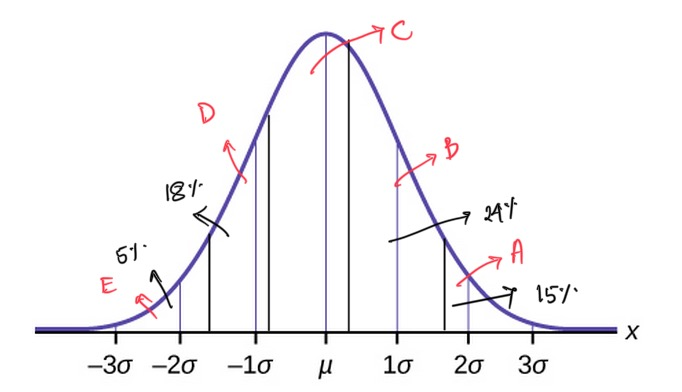

The above distribution is taken as the standard normal and expected values are taken.

In [76]:
# # Observed distribution of students
# observed = [77, 150, 210, 125, 38]
# chi_sq(observed)